In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
import matplotlib.cm as cm
import seaborn as sns
data = pd.read_csv(r"iBeacon.csv")
rssiData = data

In [2]:
print('\033[1m'+"Data Overview:")
print("##########################################################################################################"+'\033[0m')
print('\033[1m'+"type of the data"+'\033[0m',rssiData.dtypes)
print('\033[1m'+"Size Of The Data:"," Rows: "+'\033[0m',rssiData.shape[0]," Columes: ",rssiData.shape[1])
print ('\033[1m'+'\nFeatures : \n'+'\033[0m', rssiData.columns.tolist())
print ('\033[1m'+'\nMissing values :  '+'\033[0m', rssiData.isnull().sum().values.sum())
print ('\033[1m'+'\nUnique values :  \n'+'\033[0m', rssiData.nunique())
print('\033[1m'+"##########################################################################################################")

Data Overview:
##########################################################################################################
type of the data location    object
date        object
b3001        int64
b3002        int64
b3003        int64
b3004        int64
b3005        int64
b3006        int64
b3007        int64
b3008        int64
b3009        int64
b3010        int64
b3011        int64
b3012        int64
b3013        int64
dtype: object
Size Of The Data:  Rows:  1420  Columes:  15

Features : 
 ['location', 'date', 'b3001', 'b3002', 'b3003', 'b3004', 'b3005', 'b3006', 'b3007', 'b3008', 'b3009', 'b3010', 'b3011', 'b3012', 'b3013']

Missing values :   0

Unique values :  
 location     105
date        1420
b3001         14
b3002         31
b3003         32
b3004         30
b3005         21
b3006         24
b3007         18
b3008         26
b3009         21
b3010         14
b3011         18
b3012         19
b3013         20
dtype: int64
#######################################################

In [3]:
def clean_dup_NA(data):
    result = data.dropna(how = "all")
    result = result[~result.duplicated()]
    return result
def fix_col(col_index):
    x = 87 - ord(col_index.upper())
    return x

In [4]:
cleaned_rssi= clean_dup_NA(rssiData)
cleaned_rssi["x"] = cleaned_rssi['location'].str[0]
cleaned_rssi["y"] = cleaned_rssi['location'].str[1:]
##d1.drop(["location"], axis = 1, inplace = True)
cleaned_rssi['x'] = cleaned_rssi['x'].apply(fix_col)
cleaned_rssi['y'] = cleaned_rssi['y'].astype(int)
reformData = cleaned_rssi

In [5]:
reformData.head(10)

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013,x,y
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200,8,2
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200,7,1
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200,7,1
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200,7,1
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200,7,1
5,P01,10-18-2016 11:15:11,-200,-200,-82,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,7,1
6,P01,10-18-2016 11:15:09,-200,-200,-80,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200,7,1
7,P02,10-18-2016 11:15:07,-200,-200,-86,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,7,2
8,R01,10-18-2016 11:15:05,-200,-200,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200,5,1
9,R01,10-18-2016 11:15:03,-200,-200,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200,5,1


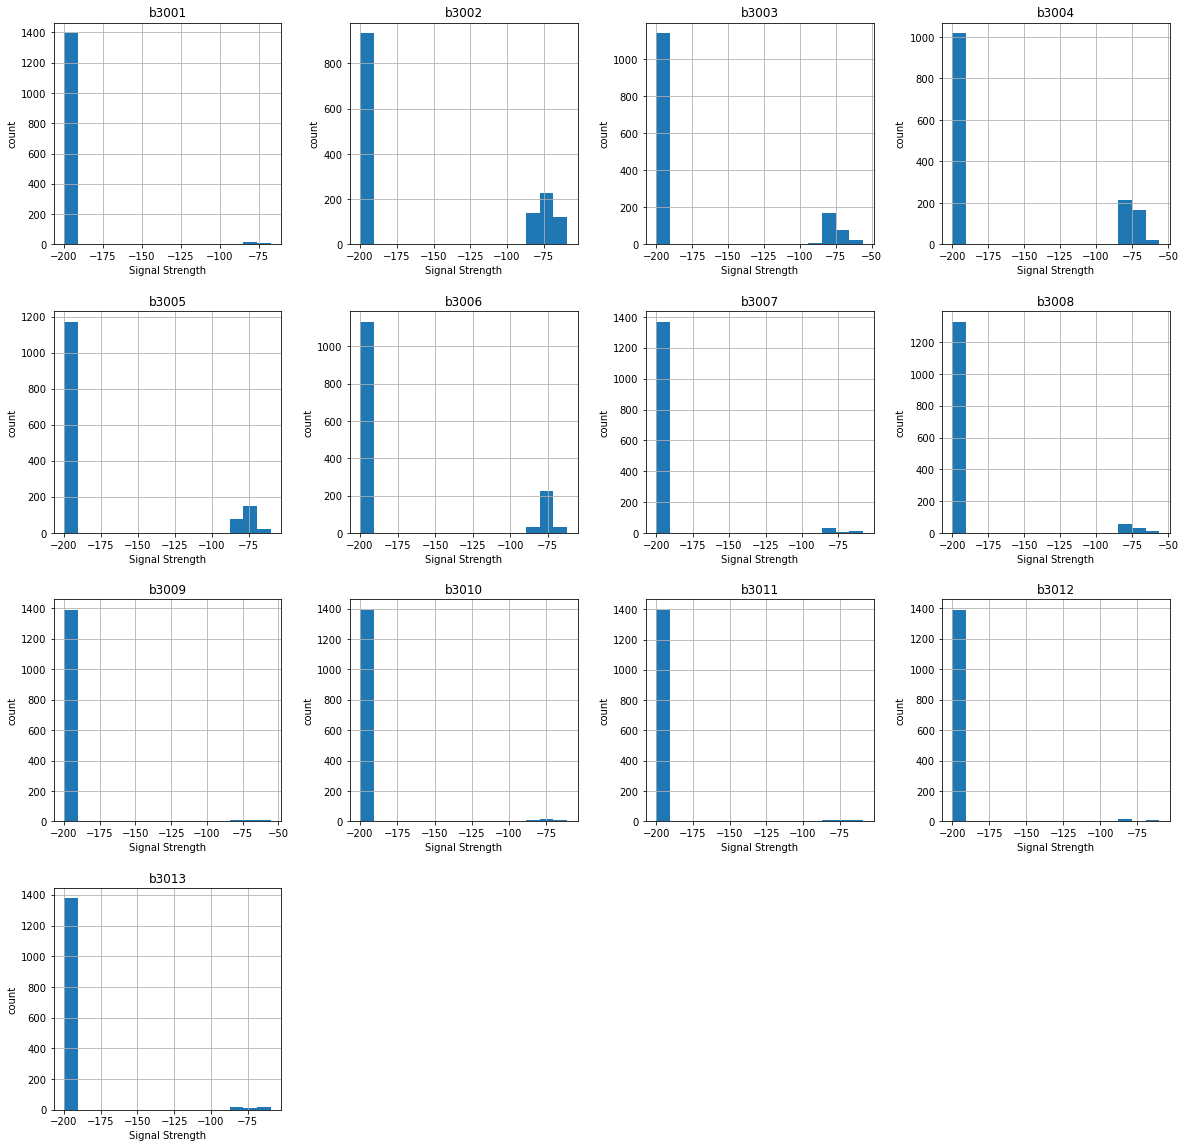

In [6]:
beaconData = reformData.iloc[:,2:]
plots = beaconData.iloc[:,:-2].hist(bins=15, figsize=(20,20))
for ax in plots.flatten():
    ax.set_xlabel("Signal Strength")
    ax.set_ylabel("count")

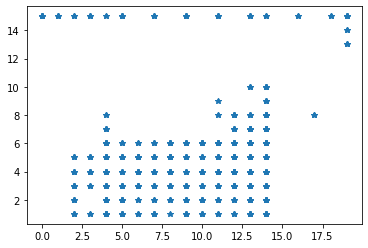

In [7]:
ibeaconMarks = beaconData.iloc[:,-2:]
plt.plot(ibeaconMarks["x"],ibeaconMarks["y"],"*")

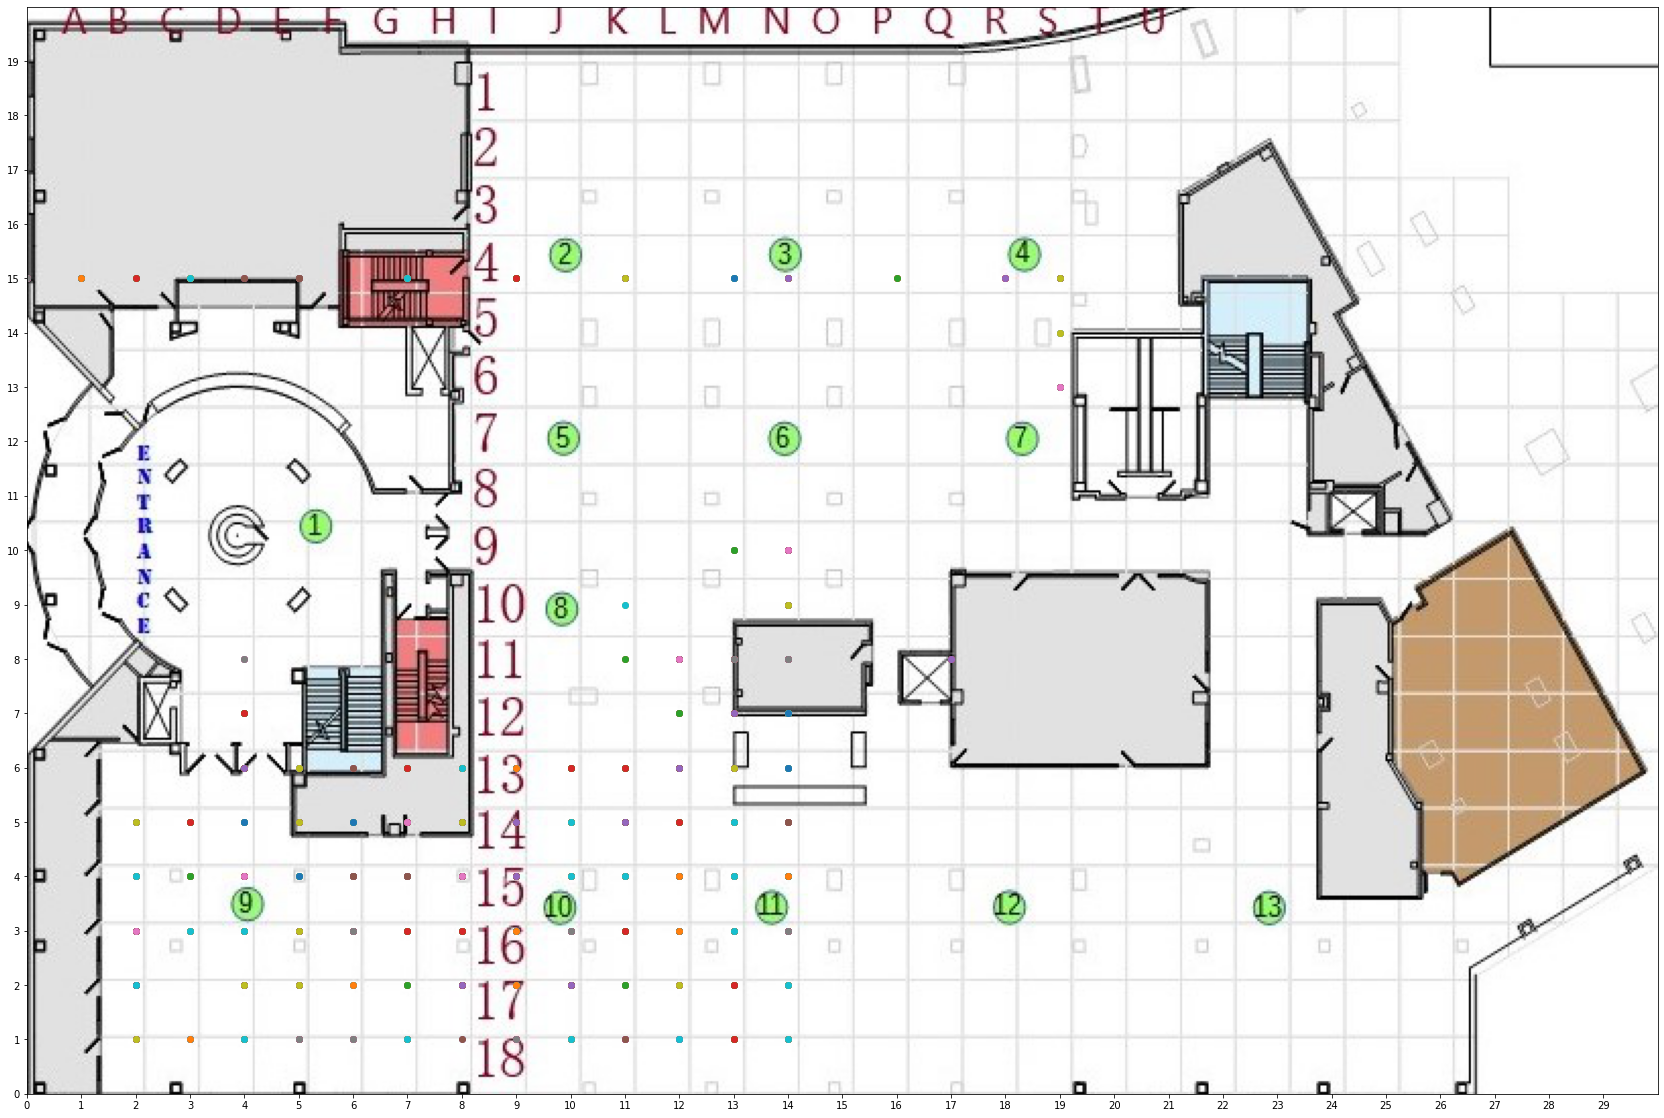

In [8]:
figsize = 30, 20
figure, ax = plt.subplots(figsize=figsize)
img = plt.imread("iBeacon_Layout2.jpg")
ext = [0.0, 30.0, 0.00, 20]
plt.imshow(img, zorder=0, extent=ext)
for i in range(len(beaconData["x"])):
    plt.plot(beaconData["x"][i],beaconData["y"][i],"o")
    my_x_ticks = np.arange(0,30, step=1)
    my_y_ticks = np.arange(0,20, step=1)
    plt.xticks(my_x_ticks)
    plt.yticks(my_y_ticks)

Text(0.5, 1.0, 'Correlation Between Each Variable')

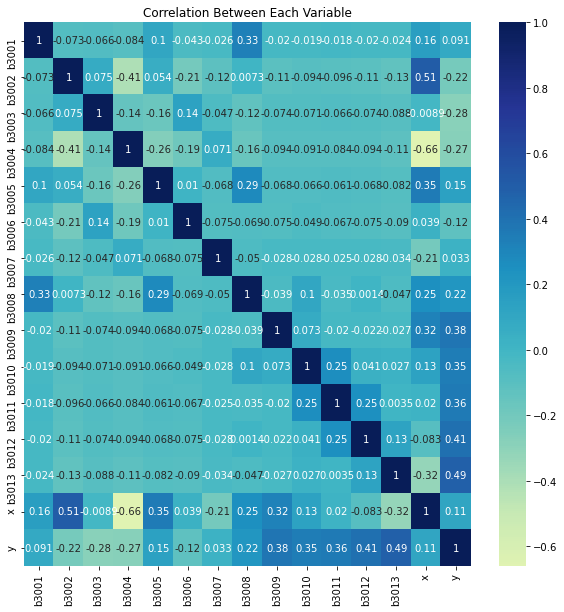

In [9]:
corr = beaconData.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr,center=0,cmap="YlGnBu",annot=True)
plt.title("Correlation Between Each Variable")

In [10]:
beaconData.to_csv(r'iBeaconData_org.csv')